In [86]:
import pandas as pd
import numpy as np
import datetime
dateparse = lambda x: pd.datetime.strptime(x, "%d.%m.%Y")

In [90]:
import glob
filenames = glob.glob("yearly/*.csv")

In [91]:
years_pd = []
for filename in filenames:
    with open(filename, encoding="utf8") as file:
        yearly_data = pd.read_csv(file, index_col=[0], parse_dates=["date"], date_parser=dateparse)
    years_pd.append(yearly_data)

In [92]:
years_data = pd.concat(years_pd, ignore_index=True)

In [93]:
years_data["month"] = years_data["date"].map(lambda x: datetime.datetime.strftime(x, "%Y-%m")) # str(x.year) + "-" + str(x.month)
years_data["month"]
years_data["circulation"] = years_data["circulation"] * 1000

In [96]:
years_data["circulation"]

0       881764.0
1       377938.0
2       361721.0
3       332245.0
4       304894.0
          ...   
5611     31707.0
5612     29637.0
5613     14644.0
5614     13212.0
5615     10907.0
Name: circulation, Length: 5616, dtype: float64

In [97]:
date_pivot = years_data.pivot_table(values=["circulation"], columns=["month"], index=["newspaper"], aggfunc=np.sum)
date_pivot.to_excel("date_pivot_2016.xlsx")

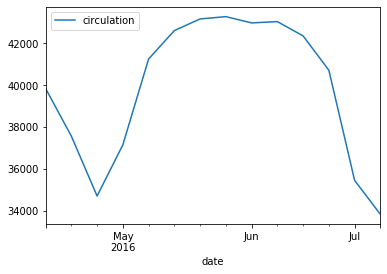

In [98]:
years_data[years_data["newspaper"] == "ÖZGÜR DÜŞÜNCE"].plot(x="date", y="circulation", kind="line")


In [99]:
years_data["newspaper"].unique()
owners = {}
with open("owners.csv", encoding="utf8") as owners_file:
    for line in owners_file.readlines():
        line = line.split(",")
        owners[line[0]] = line[1].replace("\n", "")
owners

{'newspaper': ' owner',
 'ZAMAN': ' Feza Publications',
 'POSTA': ' Demirören',
 'HÜRRİYET': ' Demirören',
 'SÖZCÜ': ' Burak Akbay',
 'SABAH': ' Turkuvaz',
 'HABERTÜRK': ' Ciner Holding',
 'P.FOTOMAÇ': ' Turkuvaz',
 'TÜRKİYE': ' İhlas Holding',
 'MİLLİYET': ' Demirören',
 'FANATİK': ' Demirören',
 'BUGÜN': ' Koza İpek Holding',
 'YENİ ŞAFAK': ' Albayrak',
 'TAKVİM': ' Turkuvaz',
 'AKŞAM': ' T Media',
 'VATAN': ' Demirören',
 'GÜNEŞ': ' T Media',
 'STAR': ' Star Media (?)',
 'TARAF': ' Başar Arslan (?)',
 'AYDINLIK': ' Şefik Hüsnü Değmer (?)',
 'CUMHURİYET': ' Cumhuriyet Vakfı',
 'YENİ ÇAĞ': ' Yeni Çağ Journalism and Printing (?)',
 'YENİ ASYA': ' Yeni Asya Journalism Printing and Publishing (Mehmet Kutlular)',
 'MİLLET': ' İleri Journalism',
 'YENİ AKİT': ' \u200eRamazan Fatih Uğurlu',
 'AMK': ' \u200eBurak Akbay',
 'ŞOK': ' ABC Media Agency',
 'MİLLİ GAZETE': ' Yeni Neşriyat',
 'YURT': ' Ayna Journalism and Production',
 'MEYDAN': ' Feza Publishing (?)',
 'KORKUSUZ': ' Burak Akbay',
 

In [100]:
years_data["owner"] = None
for record in years_data.index:
    newspaper_name = years_data["newspaper"][record]
    years_data["owner"][record] = owners[newspaper_name]

c:\users\da12\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [105]:
circulation_by_owner = years_data.groupby("owner").sum()
circulation_by_owner.to_excel("circulation_by_owner.xlsx")
circulation_by_owner

,circulation
owner,
ABC Media Agency,816201.0
Albayrak,25920389.0
Ayna Journalism and Production,272666.0
Başar Arslan (?),3232325.0
Burak Akbay,77436500.0
Ciner Holding,33359263.0
Cumhuriyet Vakfı,9891667.0
Demirören,208837645.0
Doğru Print and Publishing,3604479.0


In [102]:
years_data[years_data["owner"] == "Demirören"]

,date,newspaper,circulation,month,owner


In [103]:
years_data[years_data["owner"] == " Demirören"]["circulation"].sum()

208837645.0

ValueError: If using all scalar values, you must pass an index